In [26]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Losowe zbiory danych

In [27]:
mu, sigma = 3, 1

In [28]:
def gauss_distribution(mu, sigma, num):
    x = np.linspace(mu-4*sigma, mu+4*sigma, num=num)
    f_x = stats.norm.pdf(x, mu, sigma)
    return x, f_x

In [29]:
def basic_chars(mu, sigma, num):
    x = gauss_distribution(mu, sigma, num)[0]
    mean_ = np.round(np.mean(x))
    median_ = np.median(x)
    mode_ = stats.mode(x, keepdims=False)
    return {
            'mean': mean_,
            'median': median_,
            'mode': mode_
            }

In [30]:
def plot_distribution(mu, sigma, num):
        
    x, data = gauss_distribution(mu, sigma, num)
    
    mean_ = basic_chars(mu, sigma, num)['mean']

    range_1_sigma = (x>=mu-sigma) & (x<=mu+sigma)
    range_12_sigma_left = ((x<=mu-sigma) & (x>=mu-2*sigma))
    range_12_sigma_right = ((x>=mu+sigma) & (x<=mu+2*sigma))
    range_23_sigma_left = ((x<=mu-2*sigma) & (x>=mu-3*sigma))
    range_23_sigma_right = ((x>=mu+2*sigma) & (x<=mu+3*sigma))

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, clip_on=True,
                        gridspec_kw={'height_ratios': [4,1]},
                        layout='constrained')
    fig.set_figheight(6)
    fig.set_figwidth(7)
    ax[0].plot(x, data, color='navy', lw=2)

    ax[0].fill_between(x, data, 
                    color='red', alpha=0.125)
    ax[0].fill_between(x[range_1_sigma], data[range_1_sigma], 
                    color='red', alpha=0.75)
    ax[0].fill_between(x[range_12_sigma_left], data[range_12_sigma_left], 
                    color='red', alpha=0.5)
    ax[0].fill_between(x[range_23_sigma_left], data[range_23_sigma_left], 
                    color='red', alpha=0.25)
    ax[0].fill_between(x[range_12_sigma_right], data[range_12_sigma_right], 
                    color='red', alpha=0.5)
    ax[0].fill_between(x[range_23_sigma_right], data[range_23_sigma_right], 
                    color='red', alpha=0.25)
    ax[0].axvline(x = mu-sigma, 
                color='red', lw=0.75, linestyle = '--', label = '$[\mu-\sigma,\mu+\sigma]$')
    ax[0].axvline(x = mu+sigma, 
                color='red', lw=0.75, linestyle = '--')
    ax[0].axvline(x = mu-2*sigma, 
                color='red', lw=0.5, linestyle = '--', label = '$[\mu-2\sigma,\mu+2\sigma]$')
    ax[0].axvline(x = mu+2*sigma, 
                color='red', lw=0.5, linestyle = '--')
    ax[0].axvline(x = mu-3*sigma, 
                color='red', lw=0.25, linestyle = '--', label = '$[\mu-3\sigma,\mu+3\sigma]$')
    ax[0].axvline(x = mu+3*sigma, 
                color='red', lw=0.25, linestyle = '--')
    ax[0].axvline(x = mean_, 
                color='k', lw=1.5, linestyle = '--', label = 'mean')
    ax[0].set_ylabel('$f(X)$')
    ax[0].text(x=x.min(),y=0.8*data.max(), 
            s=f'$ \mu={mu},\,\sigma={sigma}$', bbox=dict(edgecolor='white', facecolor='lightgray', alpha=0.5))

    ax[1].boxplot(x, vert=False, patch_artist=True, widths=[0.5])
    ax[1].yaxis.set_visible(False)
    ax[1].set_xlabel('$X$')
    fig.tight_layout()
    fig.legend(loc='center right', framealpha=1)
    fig.suptitle(f'Rozkład dla liczby próbek $N$= {num}', ha = 'center', va='bottom')
    plt.show()

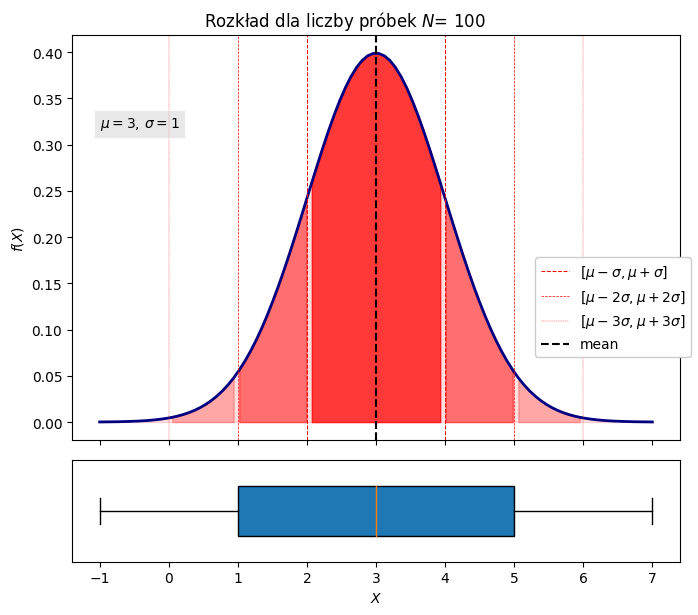

In [31]:
plot_distribution(mu, sigma, num=100)

In [32]:
basic_chars(mu, sigma, num=100)

{'mean': 3.0, 'median': 3.0, 'mode': ModeResult(mode=-1.0, count=1)}

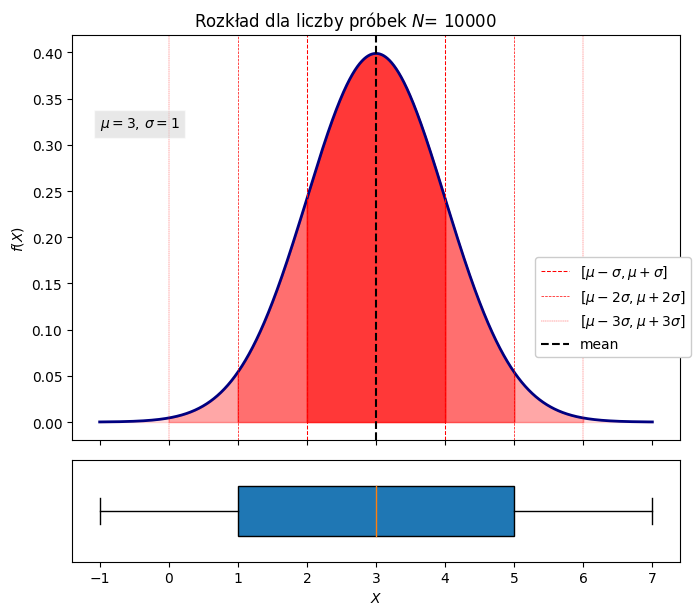

In [33]:
plot_distribution(mu, sigma, num=10000)

In [34]:
basic_chars(mu, sigma, num=100000)

{'mean': 3.0, 'median': 3.0, 'mode': ModeResult(mode=-1.0, count=1)}

In [35]:
def plot_scaled_distribution(mu, sigma, num=1000, scalling='Standarized'):

    x, f_x = gauss_distribution(mu, sigma, num)

    if scalling == 'Standarized':
        scaler_Standarized = StandardScaler()
        standarized_x = scaler_Standarized.fit_transform(x.reshape(-1,1))
        plt.figure(figsize=(5,5))
        plt.hist(standarized_x, bins=1000)
        plt.axvline(x=standarized_x.mean(), color='red', label='Średnia')
        plt.xlabel('$X$')
        plt.ylabel('$ \overline{f}\:(X)$')
        plt.show()
        print(f'Średnia: {standarized_x.mean()}')
        print(f'Odchylenie standardowe: {np.std(standarized_x, ddof=1)}')
    elif scalling == 'MinMax':
        scaler_MinMax = MinMaxScaler()
        standarized_x = scaler_MinMax.fit_transform(x.reshape(-1,1))
        plt.figure(figsize=(5,5))
        plt.hist(standarized_x, bins=1000)
        plt.axvline(x=standarized_x.mean(), color='red', label='Średnia')
        plt.xlabel('$X$')
        plt.ylabel('$ \overline{f}\:(X)$')
        plt.show()
        print(f'Średnia: {standarized_x.mean()}')
        print(f'Odchylenie standardowe: {np.std(standarized_x, ddof=1)}')
    else:
        pass

Przeskalowany (Standard) rozkład dla n=100

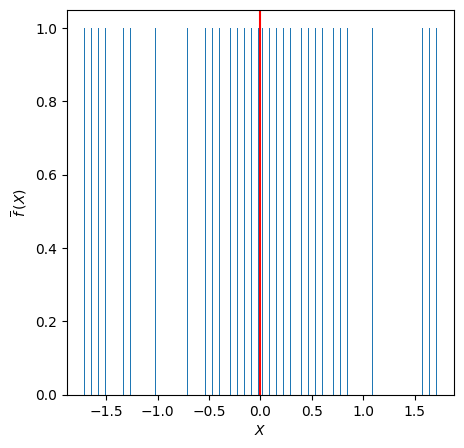

Średnia: 1.4654943925052067e-16
Odchylenie standardowe: 1.005037815259212


In [36]:
plot_scaled_distribution(mu, sigma, num=100, scalling='Standarized')

Przeskalowany (Standard) rozkład dla n=10000

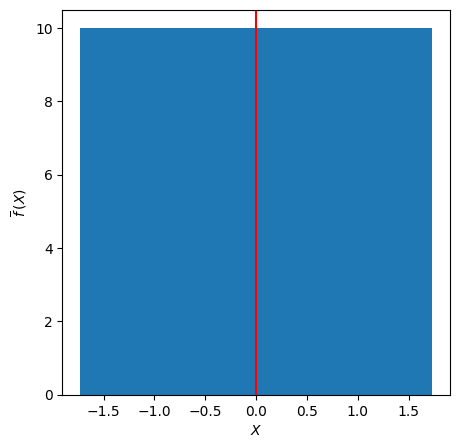

Średnia: 0.0
Odchylenie standardowe: 1.0000500037503124


In [37]:
plot_scaled_distribution(mu, sigma, num=10000, scalling='Standarized')

Przeskalowany (MinMax) rozkład dla n=10000

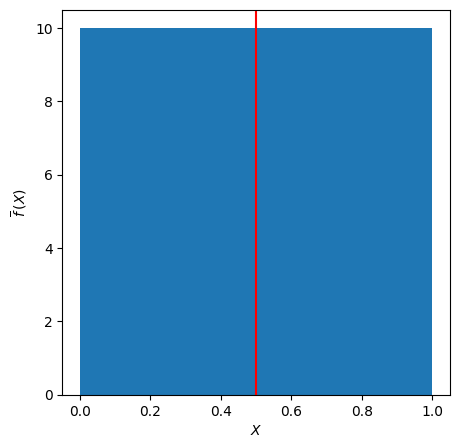

Średnia: 0.5
Odchylenie standardowe: 0.28871843983470025


In [38]:
plot_scaled_distribution(mu, sigma, num=10000, scalling='MinMax')